Домашнее задание 
===

Данные
----
Данные содержат информацию о продажах автомобилей в месяц. 

Задание
--
* Построить модель предсказаний, используя библиотеку Propeht. 
* Сделать предсказание на год вперед (12 месяцев)
* При постоении модели использовать кросс-валидацию

In [2]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
import itertools
import matplotlib.dates as mdates

In [10]:

#dataset
import pandas as pd
df = pd.read_csv('../datatest/monthly-car-sales.csv')
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [11]:
df.rename(columns={'Month':'ds',
                  'Sales':'y'},
         inplace=True)

In [12]:
df.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [19]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast= m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<ipython-input-20-d929e4e8c99a>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
<ipython-input-20-d929e4e8c99a>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


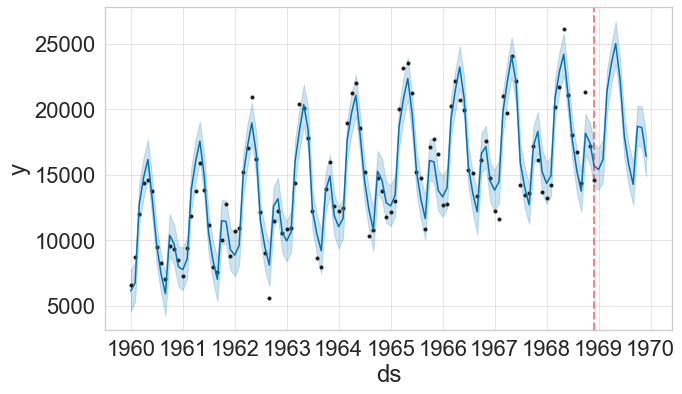

In [20]:
fig = m.plot(forecast)
ax = fig.add_subplot(111)
ax.axvline(x=forecast['ds'].max() - pd.Timedelta('365 days'), c='red', lw=2, alpha=0.5, ls='--')
fig.show()

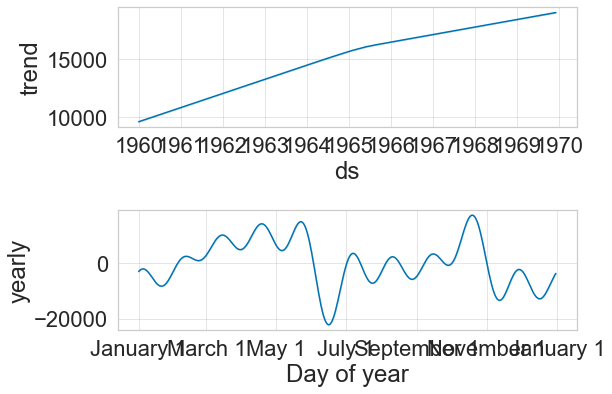

In [21]:
fig = m.plot_components(forecast)

In [22]:
df_cv = cross_validation(m, horizon='365 days')

INFO:fbprophet:Making 10 forecasts with cutoffs between 1963-06-03 12:00:00 and 1967-12-02 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

In [23]:
cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']

In [26]:
df_cv1 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[0]]

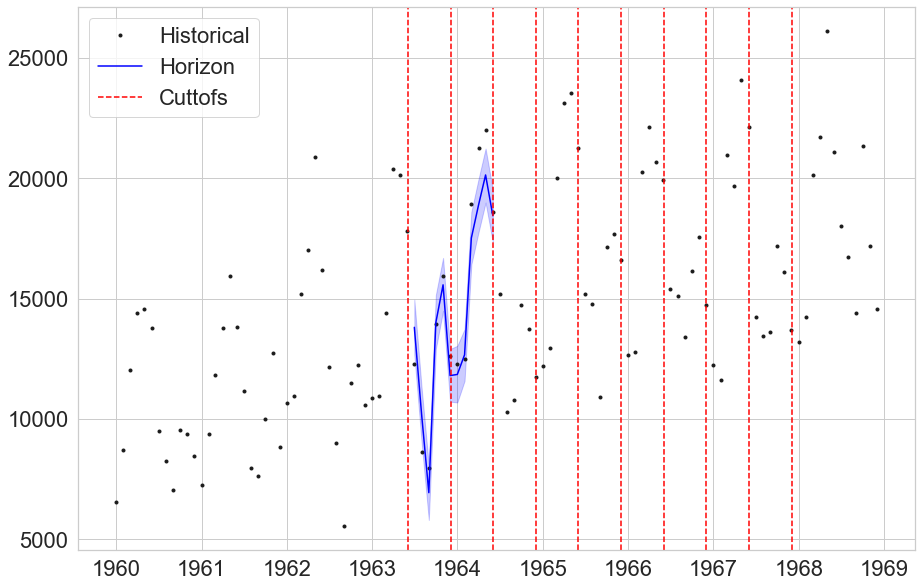

In [27]:
fig, ax = plt.subplots()

ax.plot(m.history['ds'], m.history['y'], 'k.', label = 'Historical')
ax.plot(df_cv1['ds'], df_cv1['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv1['ds'],
               df_cv1['yhat_lower'],
               df_cv1['yhat_upper'],
               color = 'blue',
               alpha = 0.2)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

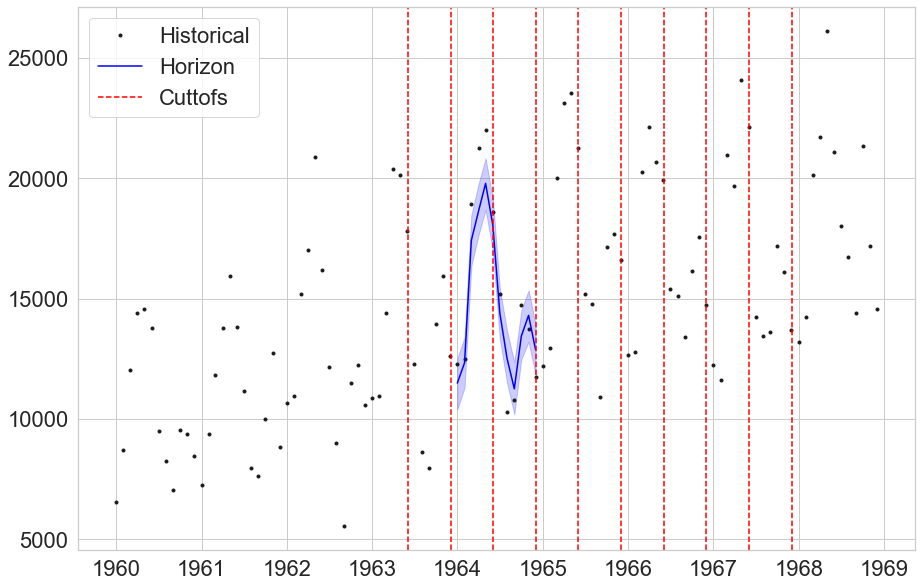

In [28]:
df_cv2 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[1]]

fig, ax = plt.subplots()

ax.plot(m.history['ds'], m.history['y'], 'k.', label = 'Historical')
ax.plot(df_cv2['ds'], df_cv2['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv2['ds'],
               df_cv2['yhat_lower'],
               df_cv2['yhat_upper'],
               color = 'blue',
               alpha = 0.2)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

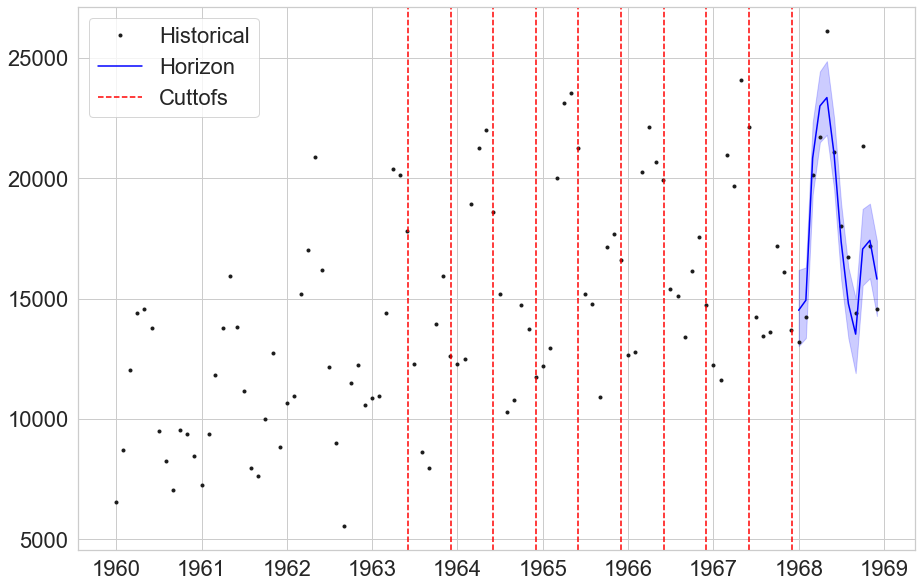

In [30]:
df_cv2 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[9]]

fig, ax = plt.subplots()

ax.plot(m.history['ds'], m.history['y'], 'k.', label = 'Historical')
ax.plot(df_cv2['ds'], df_cv2['yhat'], ls = '-', label = 'Horizon', color='blue')
ax.fill_between(df_cv2['ds'],
               df_cv2['yhat_lower'],
               df_cv2['yhat_upper'],
               color = 'blue',
               alpha = 0.2)
for i in range(len(cutoffs)):
    plt_dict = {'x': cutoffs[i],
               'c': 'red',
                'ls':'--'
               }
    if i == 0:
        plt_dict['label'] = 'Cuttofs'
    ax.axvline(**plt_dict)
ax.legend()
plt.show()

In [31]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,59 days 12:00:00,3.153639e+06,1775.848785,1600.093551,0.130422,0.119738,0.416667
1,60 days 00:00:00,2.961228e+06,1720.821953,1500.092567,0.123813,0.119738,0.458333
2,61 days 00:00:00,4.818892e+06,2195.197400,1844.578107,0.153510,0.137597,0.375000
3,89 days 00:00:00,4.145742e+06,2036.109597,1658.881671,0.121811,0.077652,0.458333
4,89 days 12:00:00,3.980678e+06,1995.163673,1614.966264,0.122091,0.102938,0.500000


In [33]:
df_p.mean()

horizon     215 days 09:46:02.790697676
mse                       3622226.51344
rmse                        1887.530389
mae                         1572.847054
mape                           0.099916
mdape                          0.085085
coverage                       0.503391
dtype: object